In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving covid-19-seoul.csv to covid-19-seoul (1).csv
User uploaded file "covid-19-seoul.csv" with length 38987 bytes


In [0]:

import pandas as pd
import numpy as np

In [19]:
# Load Dataset

data = pd.read_csv('covid-19-seoul.csv')
data.shape

(495, 8)

In [0]:
data = data.sort_values(['연번'], ascending=False)

In [21]:
data.head()

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항
0,494,9949,4.01.,여('68),양천구,-,구로구 교회 관련,-
1,493,확인중,4.01.,남('65),영등포구,-,#8271 접촉,-
2,492,9931,4.01.,남('01),고양,미국,해외접촉 추정,타시도
3,491,9911,4.01.,여('95),광진구,영국,해외접촉 추정,서울의료원
4,490,확인중,4.01.,여('32),서대문구,미국,해외접촉 추정,서울의료원


In [22]:
data.tail()

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항
490,5,9,1.31.,여(‵92),성북구,-,#5 접촉,서울의료원(퇴원)
491,4,7,1.30.,남(‵91),마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
492,3,6,1.30.,남(‵64),종로구,-,#3 접촉,서울대학교병원(퇴원)
493,2,5,1.30.,남(‵87),중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
494,1,2,1.23.,남(‵64),강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원)


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set

sns.set(font="AppleGothic")
plt.rc("axes", unicode_minus=False)

In [0]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_

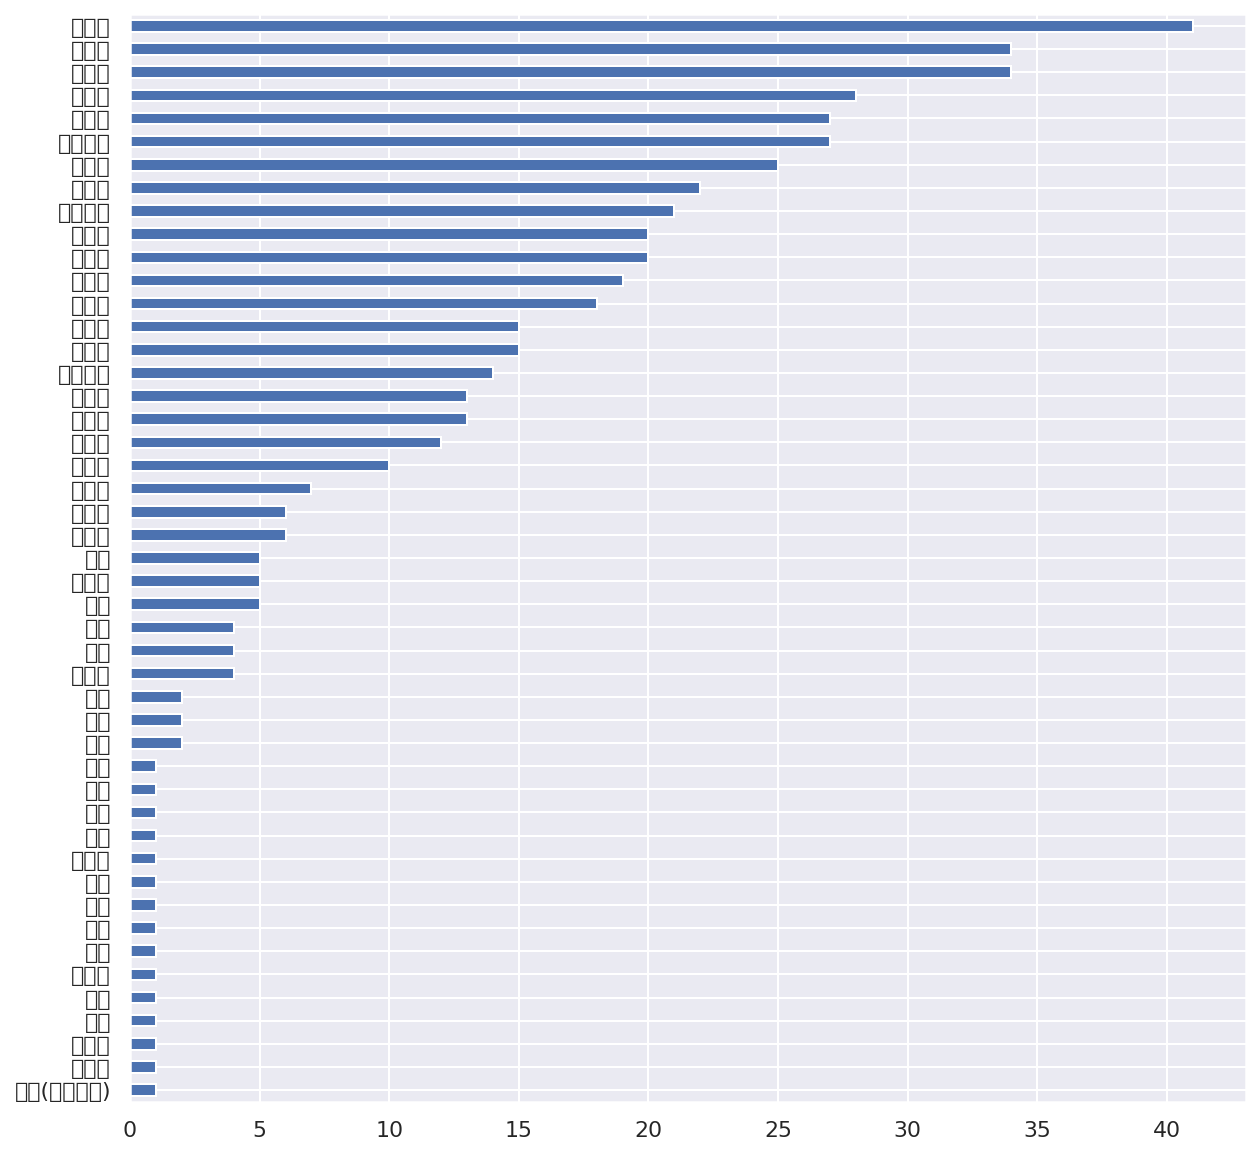

In [28]:
gu_count = data["거주지"].value_counts().sort_values()
gu_count.plot.barh(figsize=(10, 10))

In [32]:
import json

file_path = 'seoul_municipalities_geo_simple.json'
geo_json = json.load(open(file_path, encoding="utf-8"))
geo_json["features"][0]['properties']["name"]

FileNotFoundError: ignored

In [33]:
gu = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
gu[:5]

['강남구', '강동구', '강북구', '강서구', '관악구']

In [38]:

df_gu = gu_count.reset_index()
df_gu.columns = ["구", "환자수"]
df_gu.head()

,구,환자수
0,기타(재외국인),1
1,용인시,1
2,고양시,1
3,용인,1
4,파주,1


In [39]:

df_gu["구"] = df_gu["구"].replace("은평", "은평구")
df_gu["지역"] = df_gu["구"].map(lambda x : x if x in gu else "타지역")
df_gu[["구", "지역"]].head()

,구,지역
0,기타(재외국인),타지역
1,용인시,타지역
2,고양시,타지역
3,용인,타지역
4,파주,타지역


In [40]:
df_gu_etc = df_gu.groupby("지역")["환자수"].sum().sort_values()
df_gu_etc.head()

지역
중구     5
강북구    5
성동구    6
도봉구    6
광진구    7
Name: 환자수, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_

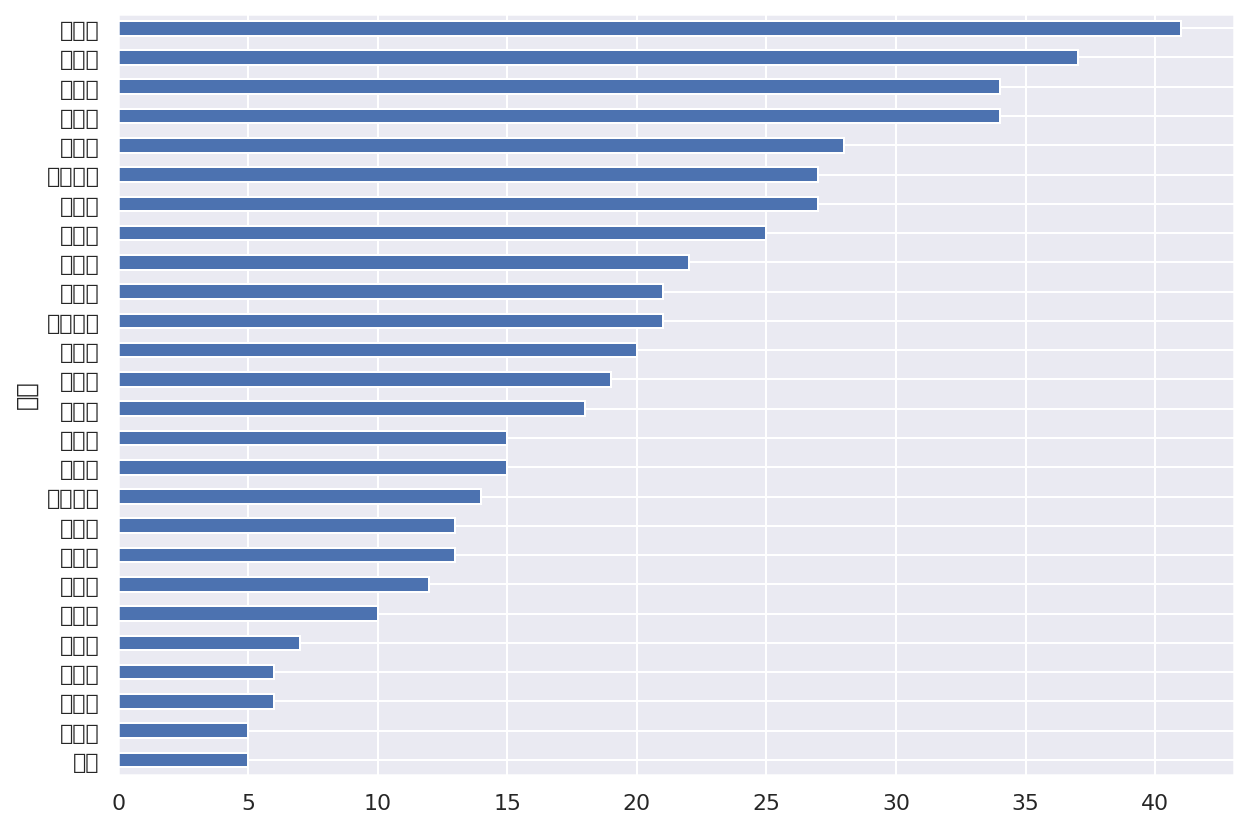

In [41]:
df_gu_etc.plot.barh(figsize=(10, 7))

In [46]:
import folium

m = folium.Map([37.562, 126.988], zoom_start=11, tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=gu_count,
    columns=['구', '환자수'],
    key_on='feature.properties.name',
    fill_color='Oranges',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='환자수'
).add_to(m)

m

NameError: ignored